In [1]:
import pandas as pd
from Isaac_functions import calculate_net_load

In [2]:
load_df = pd.read_csv(
    "/Users/tehanitanele/Documents/ECE205/src/Team-2/Isaac's Folder/data_files_new/main_meters/life_sciences_msb1_main.csv",
    parse_dates=["datetime"]
)

pv_df = pd.read_csv(
    "/Users/tehanitanele/Documents/ECE205/src/Team-2/Isaac's Folder/data_files_new/pv_data/life_science_pv.csv",
    parse_dates=["datetime"]
)

In [3]:
load_df.rename(columns={"datetime": "Timestamp", "mean": "kW"}, inplace=True)
pv_df.rename(columns={"datetime": "Timestamp", "power_avg_kw": "kW"}, inplace=True)

In [4]:
combined_df = calculate_net_load(load_df, pv_df)
combined_df.head()

,Timestamp,meter_name,Building Load (kW),sensor_id,PV Generation (kW),Net Load (kW)
0,2024-02-01 08:45:00,life_sciences_msb1_main,363.723543,6,11.764334,351.959209
1,2024-02-03 16:45:00,life_sciences_msb1_main,257.678535,6,18.689332,238.989203
2,2024-02-19 16:15:00,life_sciences_msb1_main,290.543830,6,25.568666,264.975164
3,2024-02-22 11:00:00,life_sciences_msb1_main,322.671190,6,53.838664,268.832526
4,2024-02-26 11:15:00,life_sciences_msb1_main,334.333700,6,36.713664,297.620036


In [5]:
from Isaac_functions import calculate_daily_max

In [6]:
daily_net_max_df = calculate_daily_max(combined_df)
daily_net_max_df.head()

,Date,Daily Max Net Load (kW)
0,2024-02-01,403.711872
1,2024-02-02,315.407363
2,2024-02-03,285.550766
3,2024-02-04,314.243152
4,2024-02-05,350.854324


In [7]:
import matplotlib.pyplot as plt

In [8]:
daily_net = calculate_daily_max(combined_df, value_col="Net Load (kW)")
daily_load = calculate_daily_max(combined_df, value_col="Building Load (kW)")
daily_pv = calculate_daily_max(combined_df, value_col="PV Generation (kW)")

In [9]:
stats = pd.DataFrame({
    "Net Load (kW)": [daily_net.iloc[:, 1].min(), daily_net.iloc[:, 1].max(), daily_net.iloc[:, 1].mean()],
    "Building Load (kW)": [daily_load.iloc[:, 1].min(), daily_load.iloc[:, 1].max(), daily_load.iloc[:, 1].mean()],
    "PV Generation (kW)": [daily_pv.iloc[:, 1].min(), daily_pv.iloc[:, 1].max(), daily_pv.iloc[:, 1].mean()]
}, index=["Min", "Max", "Mean"])

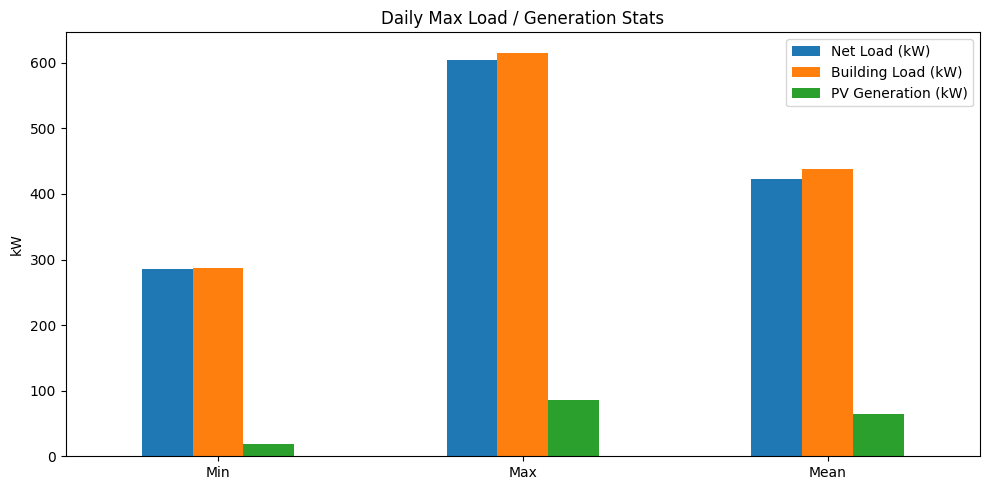

In [10]:
stats.plot(kind="bar", figsize=(10, 5), title="Daily Max Load / Generation Stats")
plt.ylabel("kW")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

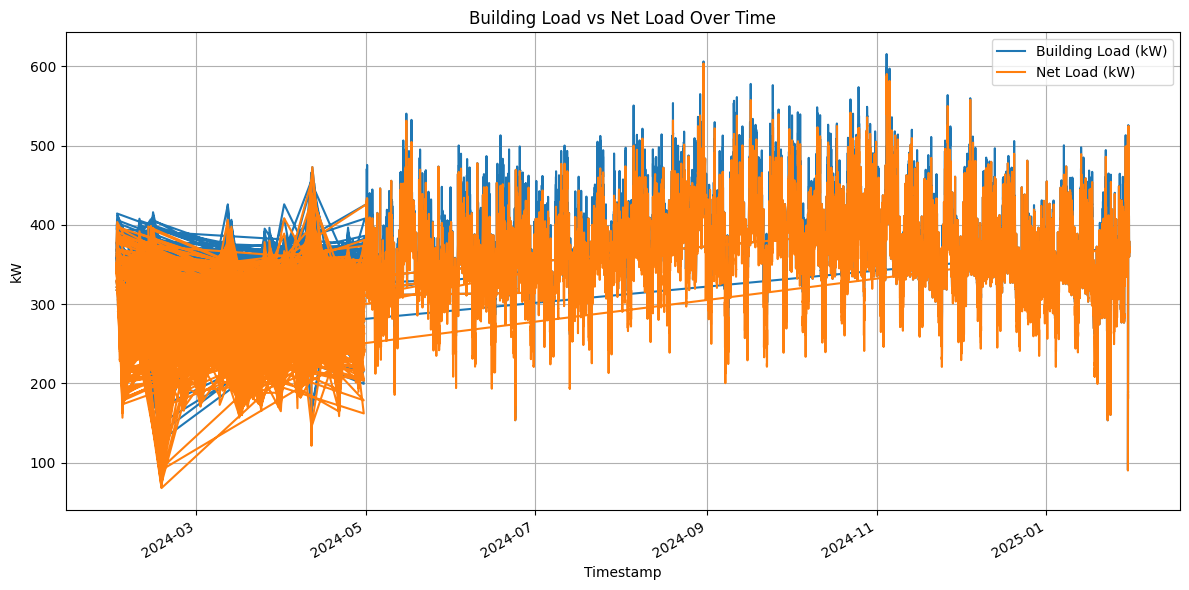

In [11]:
combined_df.plot(
    x="Timestamp",
    y=["Building Load (kW)", "Net Load (kW)"],
    figsize=(12, 6),
    title="Building Load vs Net Load Over Time"
)
plt.ylabel("kW")
plt.xlabel("Timestamp")
plt.grid(True)
plt.tight_layout()
plt.show()